<br>

##   hw6pr2digits_modeler 
+ digits clasification via decision trees and random forests...
+ Remember: feel free to re-use the cleaned data from previous weeks (already here)


In [2]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the week6 iris- + births-modeling notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code    
#

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

## Data set up...
+ Use the cleaned data from prior weeks (it should be here in this folder as digits_cleaned.csv)
+ (I don't think there's too much more to adjust, data-wise...)
+ Next, let's see how well the DT/RF techniques can predict the digit, based on its 64 pixels...

In [2]:
# let's read in our flower data...
# 
# iris_cleaned.csv should be in this folder
# 
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [3]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")

df_tidy.shape is (1768, 65)



In [4]:
df_tidy.info()  # prints column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

In [5]:
df_tidy   # let's see a few rows!

# Here is a for loop that prints each row of the dataframe, with headers (usually more than is needed!)

# for i in range(len(df_tidy)):
#     print(df_tidy[i:i+1])

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [37]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

#
# Feature names!
#
FEATURES = COLUMNS[0:64]

#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']   # int to str

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [25]:
#
# let's convert our dataframe to a numpy array, named A
#
A = df_tidy.to_numpy()   
print(A)

[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [26]:
#
# let's make sure it's all floating-point (here, it already is, but in other datasets it might not be)
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [11]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [27]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 42
print(f"digit #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

digit_index = COL_INDEX['actual_digit']
digit_num = int(round(A[n][digit_index]))
print(f"  Its digit is {digit_num}")

digit #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  6.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 0.0
  Its pix3 is 10.0
  Its pix4 is 11.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 9.0
  Its pix11 is 16.0
  Its pix12 is 6.0
  Its pix13 is 0.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 15.0
  Its pix19 is 13.0
  Its pix20 is 0.0
  Its pix21 is 0.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 14.0
  Its pix27 is 10.0
  Its pix28 is 0.0
  Its pix29 is 0.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 1.0
  Its pix34 is 15.0
  Its pix35 is 12.0
  Its pix36 is 8.0
  Its pix37 is 2.0
 

In [28]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16. 

In [29]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [7. 5. 1. ... 4. 5. 6.]
The corresponding data rows are 
 [[ 0.  0.  1. 11. 16. 16. 10.  0.  0.  0. 13. 14.  8. 12. 11.  0.  0.  0.
   4.  0.  0. 13.  4.  0.  0.  0.  0.  0.  3. 15.  0.  0.  0.  0.  2. 15.
  16. 16.  9.  0.  0.  0.  3. 13. 16.  8.  1.  0.  0.  0.  0.  7. 10.  0.
   0.  0.  0.  0.  0. 13.  3.  0.  0.  0.]
 [ 0.  8. 13. 15. 16. 16.  8.  0.  0.  9. 16. 16. 13. 11.  5.  0.  0.  6.
  16. 12.  0.  0.  0.  0.  0.  1. 14. 14.  0.  0.  0.  0.  0.  0.  8. 16.
   2.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.  3. 14. 11.  0.  0.
   0.  0.  0.  9. 16.  6.  0.  0.  0.  0.]
 [ 0.  0.  1. 15. 15.  2.  0.  0.  0.  0.  0. 12. 16.  7.  0.  0.  0.  0.
   0. 14. 16.  5.  0.  0.  0.  0.  0. 13. 16.  2.  0.  0.  0.  0.  2. 16.
  13.  0.  0.  0.  0.  0.  6. 16. 13.  0.  0.  0.  0.  0.  6. 16. 11.  0.
   0.  0.  0.  0.  1. 14. 16.  7.  0.  0.]
 [ 0.  0.  5. 14. 12.  5.  0.  0.  0.  0. 13. 16. 16.  9.  0.  0.  0.  0.
  11. 16. 16.  9.  0.  0.  0.  0. 11. 

In [30]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_permed, y_permed, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [9. 3. 6. 4. 2. 2. 5. 8. 8. 1. 4. 6. 1. 2. 9. 6. 9. 6. 1. 4. 7. 1. 6. 2.
 3. 1. 4. 7. 0. 5. 4. 0. 2. 0. 6. 6. 6. 6. 4. 3. 2. 6. 6. 8. 5. 5. 0. 0.
 7. 6. 2. 3. 0. 2. 4. 6. 3. 0. 8. 7. 1. 3. 5. 0. 2. 4. 3. 2. 5. 8. 9. 7.
 1. 2. 5. 5. 7. 1. 9. 8. 1. 0. 8. 1. 8. 4. 1. 4. 6. 0. 2. 2. 0. 5. 5. 8.
 2. 9. 0. 1. 2. 5. 9. 0. 6. 2. 3. 7. 1. 8. 8. 8. 1. 9. 5. 7. 0. 5. 3. 3.
 6. 1. 7. 5. 1. 5. 9. 9. 5. 7. 6. 6. 9. 1. 7. 1. 2. 2. 8. 7. 0. 6. 3. 2.
 4. 6. 4. 0. 7. 9. 6. 4. 0. 1. 4. 7. 1. 3. 9. 8. 1. 8. 4. 3. 8. 6. 1. 3.
 3. 6. 7. 6. 6. 8. 9. 9. 9. 2. 6. 7. 4. 3. 3. 2. 0. 5. 8. 8. 1. 1. 2. 4.
 8. 7. 8. 8. 6. 7. 7. 6. 6. 9. 6. 8. 0. 9. 7. 1. 1. 1. 3. 7. 0. 4. 0. 7.
 0. 1. 1. 0. 8. 2. 9. 2. 0. 8. 5. 8. 0. 1. 3. 0. 9. 6. 1. 9. 5. 7. 2. 8.
 4. 0. 6. 2. 3. 5. 6. 7. 5. 7. 8. 1. 8. 0. 6. 4. 8. 3. 8. 7. 9. 5. 1. 6.
 5. 0. 7. 8. 7. 9. 6. 9. 0. 5. 4. 4. 4. 5. 7. 4. 6. 6. 0. 3. 2. 2. 7. 8.
 7. 9. 1. 0. 7. 1. 5. 5. 8. 9.

## First: &nbsp; _Decision Trees_

In [31]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [32]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 0. 3. 3. 0. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0.
 3. 3. 3. 3. 0. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 0. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 0. 3. 3. 3.
 3. 3. 0. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3.
 0. 3. 3. 3. 3. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 0. 3. 3. 3.
 3. 3. 3. 0. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 0. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 0. 3. 0. 3.
 0. 3. 3. 0. 3. 0. 3. 3. 0. 3. 3. 3. 0. 3. 3. 0. 3. 3. 3. 0. 3. 3. 3. 3.
 3. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3.
 3. 0. 3. 3. 3. 0. 3. 3. 0. 3. 0. 3. 3. 3. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3.
 3. 3. 3. 0. 3. 3. 3. 3. 3. 0. 3. 3. 3. 0. 3. 3. 3. 3. 0. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 0. 0. 3. 3. 3. 3. 3.

In [33]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        #print(f"row {i:>3d} : {p:>12s} {a:<12s}   {result}")  
        print(f"row  {i}: {p} {a} {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row  0: 3 9 incorrect
row  1: 3 3 
row  2: 3 6 incorrect
row  3: 3 4 incorrect
row  4: 3 2 incorrect
row  5: 3 2 incorrect
row  6: 3 5 incorrect
row  7: 3 8 incorrect
row  8: 3 8 incorrect
row  9: 3 1 incorrect
row  10: 3 4 incorrect
row  11: 3 6 incorrect
row  12: 3 1 incorrect
row  13: 3 2 incorrect
row  14: 0 9 incorrect
row  15: 3 6 incorrect
row  16: 3 9 incorrect
row  17: 3 6 incorrect
row  18: 3 1 incorrect
row  19: 3 4 incorrect
row  20: 3 7 incorrect
row  21: 3 1 incorrect
row  22: 3 6 incorrect
row  23: 3 2 incorrect
row  24: 3 3 
row  25: 3 1 incorrect
row  26: 3 4 incorrect
row  27: 3 7 incorrect
row  28: 0 0 
row  29: 3 5 incorrect
row  30: 3 4 incorrect
row  31: 0 0 
row  32: 3 2 incorrect
row  33: 0 0 
row  34: 3 6 incorrect
row  35: 3 6 incorrect
row  36: 3 6 incorrect
row  37: 3 6 incorrect
row  38: 3 4 incorrect
row  39: 3 3 
row  40: 3 2 incorrect
row  41: 3 6 incorrect
row  42: 3 6 incorrect
row  43: 3 8 incorrect
row  44: 3 5 incorrect
row  45: 3 5 incorrect
row  4

63

In [34]:
#
# first, let's use text :)
#
text_representation = tree.export_text(dtree_model)
print(text_representation)

|--- feature_36 <= 0.50
|   |--- class: 0.0
|--- feature_36 >  0.50
|   |--- class: 3.0



In [38]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES,   # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # Yay! we created this  
                            leaves_parallel=True )    # lots of options!

print(f"# file {filename} written. Try pasting its contents to  http://viz-js.com/")
print()

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

# file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [136, 139, 140, 154, 151, 145, 135, 138, 133, 143]\nclass = 3", fillcolor="#ffffff"] ;
1 [label="gini = 0.547\nsamples = 210\nvalue = [132, 0, 2, 0, 4, 22, 4, 0, 1, 45]\nclass = 0", fillcolor="#f1bd97"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.888\nsamples = 1204\nvalue = [4, 139, 138, 154, 147, 123, 131, 138, 132, 98]\nclass = 3", fillcolor="#fefffe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


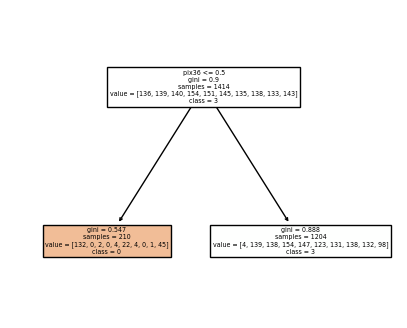

In [39]:
#
# Treeing!
#
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(5,4))              # Feel free to adjust this size...
tree_plot = tree.plot_tree(dtree_model, 
                   feature_names=FEATURES,   # Glad to have these FEATURES...
                   class_names=SPECIES,      # and these SPECIES...
                   filled=True)

In [ ]:
#
# Now, we TUNE the model (with cross-validation)...
#
# We used a depth of 1    (only 1 split) 
# There's NO way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#   + deeper always has the potential to be more accurate
#   + but at the risk of _overfitting_ the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#   + A heuristic: "Choose the _smallest_ depth at which the accuracy has plateaued"
#   + that is, is close to maximum...
#

In [40]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,10+1):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our balance.")
print()
print("Too deep and the tree will _overfit_ the training data.")
print("Too shallow and the tree will _underfit_ the training data.")

depth:  1  cv accuracy:  0.2023
depth:  2  cv accuracy:  0.3154
depth:  3  cv accuracy:  0.4583
depth:  4  cv accuracy:  0.6053
depth:  5  cv accuracy:  0.6739
depth:  6  cv accuracy:  0.7680
depth:  7  cv accuracy:  0.8246
depth:  8  cv accuracy:  0.8324
depth:  9  cv accuracy:  0.8338
depth: 10  cv accuracy:  0.8359

best_depth = 10 with acc: 0.8359095807332781 is our balance.

Too deep and the tree will _overfit_ the training data.
Too shallow and the tree will _underfit_ the training data.


In [41]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 10


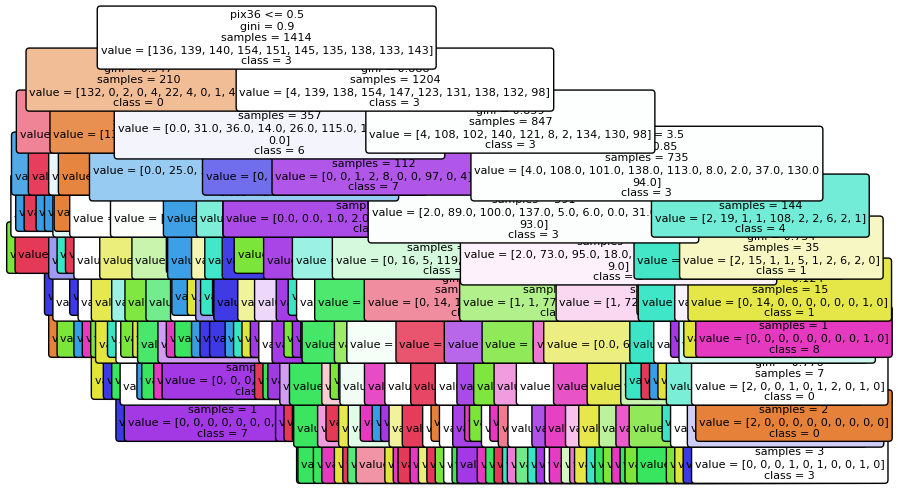

In [42]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

# Use this line to print the tree to the console in the dot language:
# print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/")

# with open(filename, "r") as f:    # here, it will print to a file:
#     all_file_text = f.read()
#     print(all_file_text)

#
# Treeing using matplotlib:
#
fig = plt.figure(figsize=(9,6))
tree_plot = tree.plot_tree(dtree_model_tuned, 
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True,
                   rounded=True,
                   fontsize=8)

In [43]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [9. 8. 6. 4. 2. 2. 5. 8. 8. 1. 4. 6. 1. 2. 9. 6. 9. 6. 1. 4. 7. 1. 6. 2.
 1. 2. 4. 7. 0. 5. 4. 0. 2. 0. 8. 6. 4. 6. 6. 3. 2. 6. 6. 8. 4. 5. 0. 0.
 8. 6. 2. 3. 0. 2. 4. 6. 3. 0. 8. 7. 1. 3. 4. 0. 2. 4. 3. 2. 5. 8. 9. 4.
 7. 7. 5. 5. 7. 1. 9. 1. 1. 0. 8. 1. 8. 4. 1. 4. 6. 0. 2. 3. 0. 5. 8. 4.
 2. 3. 0. 1. 2. 5. 7. 0. 6. 2. 3. 4. 1. 8. 8. 8. 1. 9. 5. 7. 0. 5. 3. 8.
 4. 1. 7. 5. 1. 5. 9. 9. 5. 7. 6. 6. 9. 1. 7. 1. 2. 8. 0. 7. 0. 6. 3. 2.
 4. 6. 4. 0. 7. 9. 6. 4. 0. 1. 4. 7. 1. 3. 7. 1. 2. 8. 4. 3. 8. 6. 1. 3.
 3. 6. 7. 6. 6. 1. 8. 9. 9. 2. 6. 7. 6. 3. 3. 2. 0. 5. 8. 8. 2. 1. 0. 4.
 8. 2. 8. 3. 6. 7. 7. 4. 6. 7. 6. 8. 0. 9. 7. 1. 9. 1. 3. 7. 0. 4. 0. 7.
 0. 1. 1. 0. 2. 0. 9. 4. 0. 8. 5. 8. 0. 1. 3. 5. 4. 6. 1. 9. 5. 7. 2. 8.
 4. 0. 6. 2. 3. 5. 6. 7. 3. 3. 8. 1. 8. 0. 6. 4. 8. 3. 8. 7. 9. 5. 1. 6.
 5. 0. 7. 8. 7. 9. 6. 9. 0. 5. 4. 4. 3. 5. 7. 4. 6. 6. 0. 3. 2. 2. 7. 8.
 7. 9. 1. 0. 7. 1. 5. 5. 8. 5. 8. 3. 2. 9. 9. 2. 1. 7. 9. 6. 9. 2. 4. 3.
 6. 1. 6. 3. 0. 0. 8. 9. 7. 2. 7.

300

In [44]:
print(dtree_model_tuned.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_tuned.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.00397291 0.         0.0095927  0.04923886
 0.00161823 0.         0.         0.02870546 0.02455707 0.00155967
 0.00150826 0.02116924 0.00437663 0.         0.         0.00207951
 0.00393293 0.00962329 0.04164203 0.09204357 0.         0.
 0.00156859 0.00447312 0.05554363 0.04553769 0.01169313 0.00280494
 0.0199248  0.         0.         0.06698726 0.01266223 0.00316501
 0.07298416 0.03339174 0.00579661 0.         0.         0.00974789
 0.12602635 0.05707583 0.00275404 0.00395666 0.         0.
 0.         0.         0.0162913  0.00380154 0.00386909 0.
 0.00560209 0.         0.         0.         0.01188784 0.00350953
 0.06722176 0.05001446 0.00608836 0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    0.40% of the decision-making importance.
Feature         pix3 has    0.00% of the decision-making importance.
Feature         pix4 has    0.9

In [45]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 10


In [46]:
#
# final predictive model (decision trees), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species
   
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


# run on each one:
for Features in LoD:
    predicted_species = predictive_model( Features, dtree_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict 4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 from the features [0, 0, 0, 3, 16,

In [47]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.00184877 0.01506257 0.01070011 0.         0.06375066
 0.01435703 0.         0.         0.00313231 0.01976915 0.00127885
 0.0131483  0.02162284 0.         0.         0.         0.00121089
 0.01833982 0.01832034 0.04182941 0.07965219 0.00341643 0.
 0.00128805 0.         0.01953124 0.0570734  0.00675199 0.04617818
 0.00255357 0.         0.         0.1038353  0.03069069 0.01194809
 0.07292432 0.02606363 0.00400202 0.         0.         0.
 0.07682659 0.05655186 0.01817687 0.00702422 0.0061179  0.
 0.         0.         0.00577523 0.003112   0.00575999 0.01436012
 0.02328507 0.00233528 0.         0.         0.00376065 0.00108115
 0.06245582 0.00309713 0.         0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.18% of the decision-making importance.
Feature         pix2 has    1.51% of the decision-making importance.
Feature         pix3 has    1.07% of the decision-making importance.
Feature         pix4 has    0.0

In [48]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!     More workflows, and more trees...
#

#
# Random Forests are next:
#

## Then: &nbsp; _Random Forests_

In [ ]:
#
# Random Forests!!!
#

# Lots of trees, each using a subset of the data usually at a limited depth
#                These many trees then get together to "vote" on the correct classification...

#
# This is an example of an "ensemble" classifier, because a RF is simply an ensemble of many DTs.
# 

In [49]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   

# We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [50]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [9. 3. 6. 4. 2. 2. 5. 3. 8. 3. 4. 6. 2. 3. 0. 6. 9. 6. 3. 4. 7. 2. 6. 2.
 3. 3. 4. 7. 0. 5. 4. 0. 2. 0. 3. 6. 6. 6. 4. 3. 2. 6. 6. 2. 5. 5. 0. 0.
 7. 6. 2. 3. 0. 3. 4. 6. 3. 0. 8. 7. 3. 3. 4. 0. 2. 4. 3. 3. 6. 8. 0. 4.
 9. 2. 5. 5. 7. 3. 9. 2. 8. 0. 4. 5. 2. 4. 2. 4. 6. 0. 3. 3. 0. 5. 5. 3.
 3. 3. 0. 5. 3. 5. 7. 0. 6. 2. 3. 7. 1. 2. 8. 2. 6. 7. 5. 7. 0. 5. 3. 3.
 0. 6. 7. 5. 3. 0. 0. 3. 5. 7. 6. 6. 3. 2. 7. 8. 2. 2. 0. 7. 0. 6. 3. 2.
 4. 6. 4. 0. 7. 9. 6. 4. 0. 4. 7. 7. 5. 3. 7. 2. 6. 7. 4. 3. 8. 6. 3. 3.
 3. 6. 7. 6. 6. 4. 4. 9. 9. 3. 6. 7. 4. 3. 3. 2. 0. 5. 8. 4. 7. 2. 0. 4.
 3. 7. 2. 3. 6. 7. 4. 4. 6. 7. 6. 8. 0. 9. 7. 4. 9. 3. 3. 7. 0. 4. 0. 7.
 0. 8. 8. 0. 6. 0. 3. 7. 0. 3. 5. 8. 0. 5. 3. 0. 9. 6. 2. 0. 5. 7. 6. 8.
 4. 0. 6. 3. 3. 5. 6. 4. 9. 7. 2. 2. 7. 0. 6. 4. 4. 3. 8. 7. 9. 0. 9. 6.
 5. 0. 7. 3. 7. 0. 6. 3. 0. 4. 0. 4. 4. 9. 7. 4. 6. 6. 0. 3. 2. 2. 7. 8.
 4. 9. 2. 0. 7. 2. 5. 5. 3. 0. 8. 3. 2. 0. 5. 3. 3. 7. 0. 6. 9. 3. 4. 3.
 4. 2. 6. 3. 0. 0. 8. 3. 7. 7. 7.

234

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=659765453)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix38 <= 0.5\ngini = 0.899\nsamples = 554\nvalue = [67, 76, 68, 76, 70, 73, 60, 64, 72, 81]\nclass = 9", fillcolor="#fffdfe"] ;
1 [label="gini = 0.843\nsamples = 264\nvalue = [4, 70, 67, 35, 5, 40, 20, 13, 64, 11]\nclass = 1", fillcolor="#fffffd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.859\nsamples = 290\nvalue = [63, 6, 1, 41, 65, 33, 40, 51, 8, 70]\nclass = 9", fillcolor="#fffcfc"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


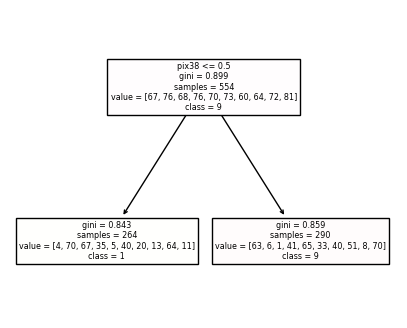

In [51]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here. 
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

#
# Treeing!
#
fig = plt.figure(figsize=(5,4))
tree_plot = tree.plot_tree(one_rf_tree, 
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [52]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We previously used a depth of 1  and #trees of 42  
#
# So, we try several depths to find best_d
#            and several #'s of trees to find best_ntrees
#
# The tradeoff is underfitting/overfitting and time...
#     "too many trees" tends may add noticeably to execution time

In [53]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")  

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.6846
depth:  1 ntrees: 150 cv accuracy:  0.7143
depth:  1 ntrees: 250 cv accuracy:  0.7058
depth:  2 ntrees:  50 cv accuracy:  0.7984
depth:  2 ntrees: 150 cv accuracy:  0.8260
depth:  2 ntrees: 250 cv accuracy:  0.8239
depth:  3 ntrees:  50 cv accuracy:  0.8600
depth:  3 ntrees: 150 cv accuracy:  0.8713
depth:  3 ntrees: 250 cv accuracy:  0.8720
depth:  4 ntrees:  50 cv accuracy:  0.9067
depth:  4 ntrees: 150 cv accuracy:  0.9067
depth:  4 ntrees: 250 cv accuracy:  0.9137
depth:  5 ntrees:  50 cv accuracy:  0.9286
depth:  5 ntrees: 150 cv accuracy:  0.9314
depth:  5 ntrees: 250 cv accuracy:  0.9364

best_depth: 5 and best_num_trees: 250 are our choices. Acc: 0.9363631807132295


In [54]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth =  best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=250


In [55]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [9. 3. 6. 4. 2. 2. 5. 8. 8. 1. 4. 6. 1. 2. 9. 6. 9. 6. 1. 4. 7. 1. 6. 2.
 3. 1. 4. 7. 0. 5. 4. 0. 2. 0. 6. 6. 6. 6. 4. 3. 2. 6. 6. 8. 5. 5. 0. 0.
 7. 6. 2. 3. 0. 2. 4. 6. 3. 0. 8. 7. 1. 3. 4. 0. 2. 4. 3. 2. 5. 8. 9. 4.
 9. 2. 5. 5. 7. 1. 9. 8. 1. 0. 8. 1. 8. 4. 1. 4. 6. 0. 2. 3. 0. 5. 5. 9.
 2. 9. 0. 1. 2. 5. 7. 0. 6. 2. 3. 7. 1. 8. 8. 8. 2. 5. 5. 7. 0. 5. 3. 3.
 6. 1. 7. 5. 1. 5. 9. 9. 5. 7. 6. 6. 9. 1. 7. 1. 2. 2. 5. 7. 0. 6. 3. 2.
 4. 6. 4. 0. 7. 9. 6. 4. 0. 1. 4. 7. 1. 3. 5. 1. 2. 8. 4. 3. 8. 6. 1. 3.
 3. 6. 7. 6. 6. 8. 9. 1. 9. 2. 6. 7. 4. 3. 3. 2. 0. 5. 8. 8. 1. 1. 0. 4.
 8. 7. 8. 8. 6. 7. 7. 0. 6. 7. 6. 8. 0. 9. 7. 1. 1. 1. 3. 7. 0. 4. 0. 7.
 0. 1. 1. 0. 2. 2. 9. 1. 0. 8. 5. 8. 0. 1. 3. 0. 9. 6. 1. 9. 5. 7. 2. 8.
 4. 0. 6. 2. 3. 5. 6. 7. 5. 7. 8. 1. 8. 0. 6. 4. 8. 3. 8. 7. 9. 5. 9. 6.
 5. 0. 7. 1. 7. 9. 6. 9. 0. 5. 4. 4. 7. 5. 7. 4. 6. 6. 0. 3. 2. 2. 7. 8.
 7. 9. 1. 0. 7. 1. 5. 5. 8. 9. 8. 3. 2. 9. 5. 2. 1. 7. 9. 6. 9. 2. 4. 3.
 4. 2. 6. 3. 0. 0. 8. 5. 7. 2. 7.

332

In [56]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=250


In [57]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species
   
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


# run on each one:
for Features in LoD:
    predicted_species = predictive_model( Features, rforest_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict 4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 from the features [0, 0, 0, 3, 16,

In [58]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 6.13572376e-04 2.37309625e-02 5.66105457e-03
 3.81978527e-03 1.84661619e-02 9.50551329e-03 4.20263773e-04
 0.00000000e+00 9.12243722e-03 2.45219935e-02 2.36143942e-03
 8.13059881e-03 2.46547286e-02 2.66349419e-03 1.07143389e-04
 0.00000000e+00 5.52809375e-03 1.61732174e-02 2.14698911e-02
 3.23376495e-02 5.89384896e-02 7.00439229e-03 6.69283752e-05
 1.41378754e-05 1.36448006e-02 4.37291626e-02 1.97020605e-02
 4.44047865e-02 2.01468766e-02 4.15130561e-02 1.60397539e-05
 0.00000000e+00 4.23155908e-02 2.83322058e-02 1.72503191e-02
 4.48721333e-02 1.76197390e-02 3.16025458e-02 0.00000000e+00
 0.00000000e+00 1.28081636e-02 3.77924689e-02 5.01962227e-02
 1.94912958e-02 1.22171187e-02 1.93835655e-02 0.00000000e+00
 0.00000000e+00 1.11779870e-03 8.30863588e-03 1.81639793e-02
 9.46910118e-03 2.30151652e-02 3.48397037e-02 1.38188427e-03
 2.67154004e-05 1.77092554e-03 1.94848924e-02 5.15737738e-03
 3.15466261e-02 3.36074925e-02 1.75023996e-02 2.25720251e-03]

Feature         pix0 h

In [59]:
#
# That's the random-forest model! 
#
# Let's consider the forest found, not lost, amid all of its many trees!
#

<br>
<hr>
<br>

### Final task: &nbsp; _Visualizing_ pixel-importance:
+ using your best Random Forest model, find the 64 _relative feature importances_ for all 64 of the digits' pixels!
  + Show these as a list of 64 values (they will be difficult to imagine, but you will see that they vary a great deal, pixel-to-pixel)
+ Then, grab-and-adapt the code for visualizing individual digits in order to visualize the "importance image" of pixels...
+ that is, you'll create a heat map visualization, which is really just another image, of how relatively-important each of the 64 pixels is in your final Random Forest

This visualization will be a "low-res image" similar to the digits, ***but it won't itself be a digit*** 
+ Instead, it will show _how much_ each of the 64 spots, across all of the 8x8 grids in the dataset, contribute in classifying each digit...


pixels as 2d numpy array (image):
 [[0.00000000e+00 6.13572376e-04 2.37309625e-02 5.66105457e-03
  3.81978527e-03 1.84661619e-02 9.50551329e-03 4.20263773e-04]
 [0.00000000e+00 9.12243722e-03 2.45219935e-02 2.36143942e-03
  8.13059881e-03 2.46547286e-02 2.66349419e-03 1.07143389e-04]
 [0.00000000e+00 5.52809375e-03 1.61732174e-02 2.14698911e-02
  3.23376495e-02 5.89384896e-02 7.00439229e-03 6.69283752e-05]
 [1.41378754e-05 1.36448006e-02 4.37291626e-02 1.97020605e-02
  4.44047865e-02 2.01468766e-02 4.15130561e-02 1.60397539e-05]
 [0.00000000e+00 4.23155908e-02 2.83322058e-02 1.72503191e-02
  4.48721333e-02 1.76197390e-02 3.16025458e-02 0.00000000e+00]
 [0.00000000e+00 1.28081636e-02 3.77924689e-02 5.01962227e-02
  1.94912958e-02 1.22171187e-02 1.93835655e-02 0.00000000e+00]
 [0.00000000e+00 1.11779870e-03 8.30863588e-03 1.81639793e-02
  9.46910118e-03 2.30151652e-02 3.48397037e-02 1.38188427e-03]
 [2.67154004e-05 1.77092554e-03 1.94848924e-02 5.15737738e-03
  3.15466261e-02 3.36074925

<Axes: >

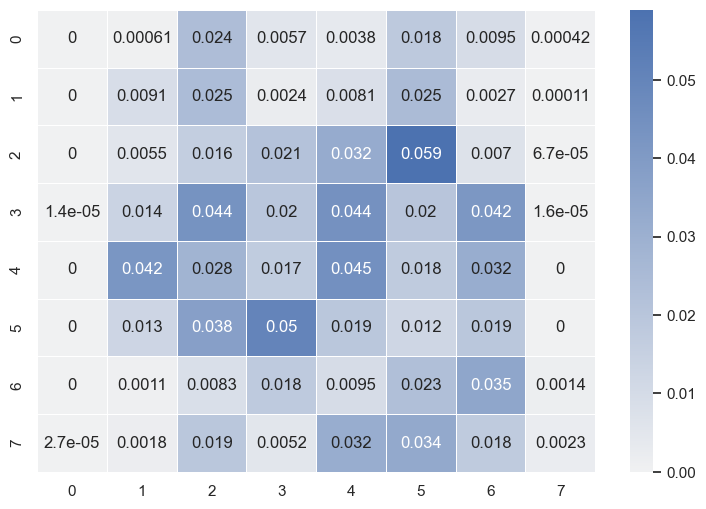

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

# Load the example flights dataset and convert to CS35_Participant_2-form
digits_orig = pd.read_csv('./digits.csv')
list_of_column_names = digits_orig.columns

ROW = 0
COLUMN = 1

pixels_as_image = np.reshape(IMPs, (8,8))   # reshape into a 2d 8x8 array (image)
print("\npixels as 2d numpy array (image):\n", pixels_as_image)

# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 6))

# colormap choice! Fun!   www.practicalpythonfordatascience.com/ap_seaborn_palette or seaborn.pydata.org/tutorial/color_palettes.html
our_colormap = sns.color_palette("light:b", as_cmap=True) 

# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=True, linewidths=.5, ax=ax, cmap=our_colormap)

In [70]:
#
# That's it!  Welcome to the world of model-building workflows!!    
#
#             Our prediction?  We'll be back for more ML! 
#


# If you'd like, the EC is to run a DT/RF workflow on your own data...   (in hw6ec_modeler.ipynb)

